# Finance Project: Deep Neural Network

## Supervised machine learning algorithm using Lending Club dataset.

# Project Objective: 
### To develop a supervised machine learning model in order to identify which borrowers will payoff their loans. The project implications can be beneficial to the financial institute in risk assessments, whether the prospective borrower would default or payoff the loan. This can be used to identify a strategy for loan approval and profitable target market. Ultimately, this model serves as the blueprint to decrease bussiness risks and increase profitability of the organization.

# Predictive Model: Deep Neural Network
### Real life dataset by one of the financial powerhouses, Lending Club. Supervised machine learning deep neural network will be used to perform binary classification. In this project, the target feature or y-variable will be "Loan Status".  

# Process:
### This project will start off with exploratory data analysis, data visualization, feature-engineering, and preparing the dataset for machine learning. The end result the accuracy of the model to predict payoff or default loan. 

### Importing libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
data = pd.read_csv("lending_club_loan_two.csv", engine='python')

In [16]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [126]:
data.shape

(24858, 79)

### This is a large dataset, which has ~396000 observations having float and object data type. 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24908 entries, 0 to 24907
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             24908 non-null  float64
 1   term                  24908 non-null  object 
 2   int_rate              24908 non-null  float64
 3   installment           24908 non-null  float64
 4   grade                 24908 non-null  object 
 5   sub_grade             24908 non-null  object 
 6   emp_title             23500 non-null  object 
 7   emp_length            23775 non-null  object 
 8   home_ownership        24908 non-null  object 
 9   annual_inc            24908 non-null  float64
 10  verification_status   24908 non-null  object 
 11  issue_d               24908 non-null  object 
 12  loan_status           24908 non-null  object 
 13  purpose               24908 non-null  object 
 14  title                 24815 non-null  object 
 15  dti                

### Visualizing loan payoff vs chargeoff. 

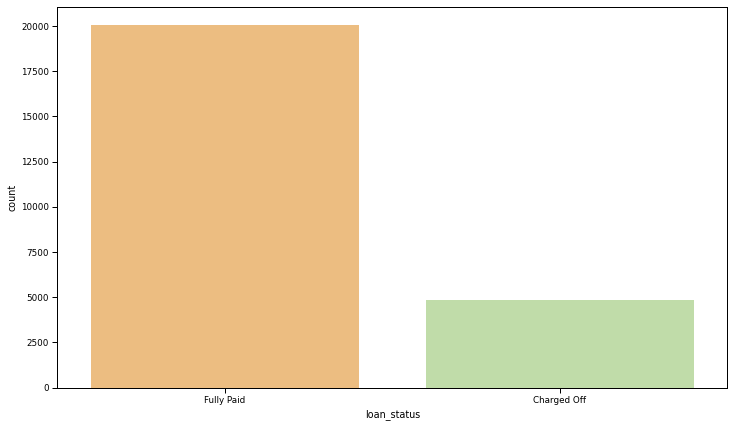

In [18]:
plt.figure(figsize=(12,7))
sns.set_context("paper")
sns.countplot(x="loan_status", data=data, palette="Spectral")

### Visualizing the distribution of loan amount borrowed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


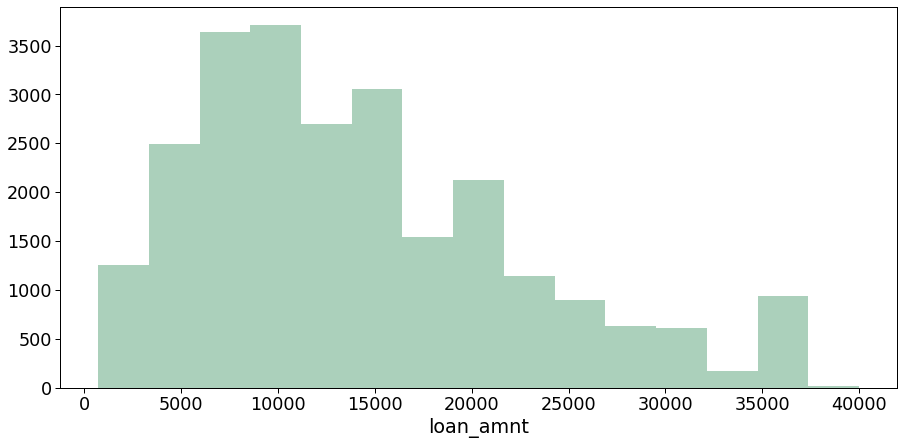

In [19]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=2)
sns.distplot(data["loan_amnt"], bins=15, kde=False, color="seagreen")

### Descriptive analysis and correlation of features. 

In [20]:
data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.172071,0.954725,0.321978,0.036004,0.184089,-0.077943,0.349984,0.093773,0.209518,0.226838,-0.109127
int_rate,0.172071,1.000000,0.164548,-0.056329,0.182990,0.010317,0.067380,-0.009146,0.297982,-0.039318,-0.078407,0.066351
installment,0.954725,0.164548,1.000000,0.316427,0.031186,0.174306,-0.065101,0.337444,0.114539,0.188512,0.199480,-0.098488
annual_inc,0.321978,-0.056329,0.316427,1.000000,-0.178580,0.119828,-0.017073,0.294653,0.033728,0.176103,0.225145,-0.049879
dti,0.036004,0.182990,0.031186,-0.178580,1.000000,0.305527,-0.034677,0.145120,0.186495,0.228162,-0.049764,-0.025676
open_acc,0.184089,0.010317,0.174306,0.119828,0.305527,1.000000,-0.016849,0.236116,-0.133074,0.674796,0.115778,-0.029885
pub_rec,-0.077943,0.067380,-0.065101,-0.017073,-0.034677,-0.016849,1.000000,-0.120191,-0.090574,0.025330,0.013157,0.724610
revol_bal,0.349984,-0.009146,0.337444,0.294653,0.145120,0.236116,-0.120191,1.000000,0.247185,0.204017,0.217367,-0.136745
revol_util,0.093773,0.297982,0.114539,0.033728,0.186495,-0.133074,-0.090574,0.247185,1.000000,-0.107078,0.010833,-0.092470
total_acc,0.209518,-0.039318,0.188512,0.176103,0.228162,0.674796,0.025330,0.204017,-0.107078,1.000000,0.387269,0.046054


### Noted that loan amount and interest rate has high correlation, which is expected. Total account & open account also has high correlation. Lastly, public record and bankcruptcies, which also makes sense. 

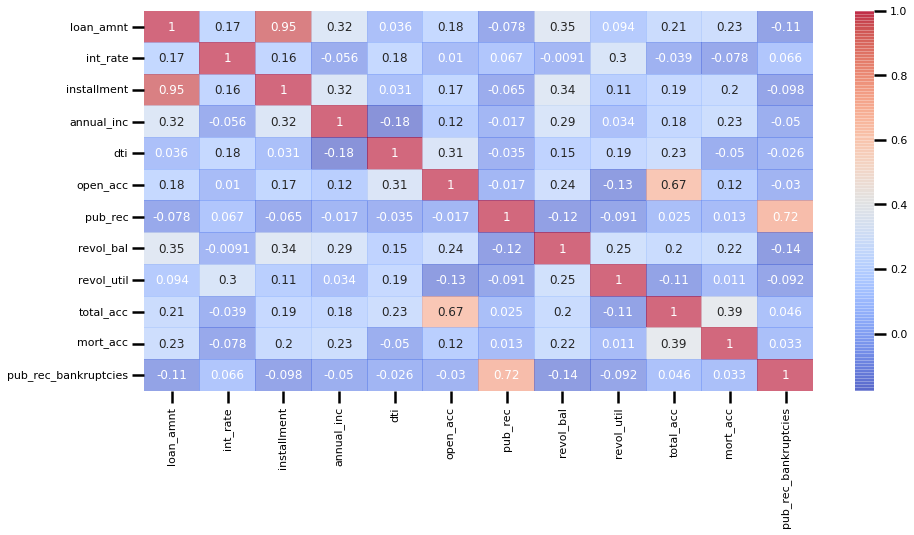

In [21]:
plt.figure(figsize=(15,7))
sns.set_context("poster", font_scale=0.5)
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", alpha=0.6)

### Visualizing the relationship between installment and loan amount.

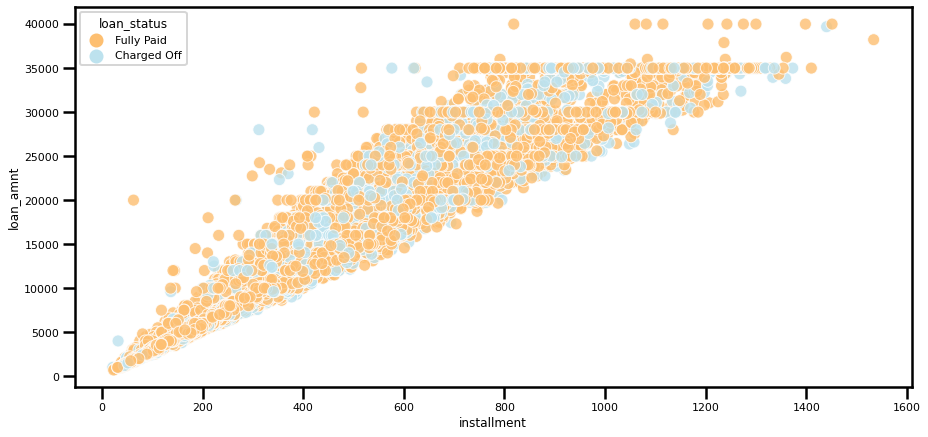

In [22]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="installment", y="loan_amnt", data=data, alpha=0.8, hue="loan_status", palette="RdYlBu" )

### Noted that there is only a slight difference in full paid and charged off on loan amount. 

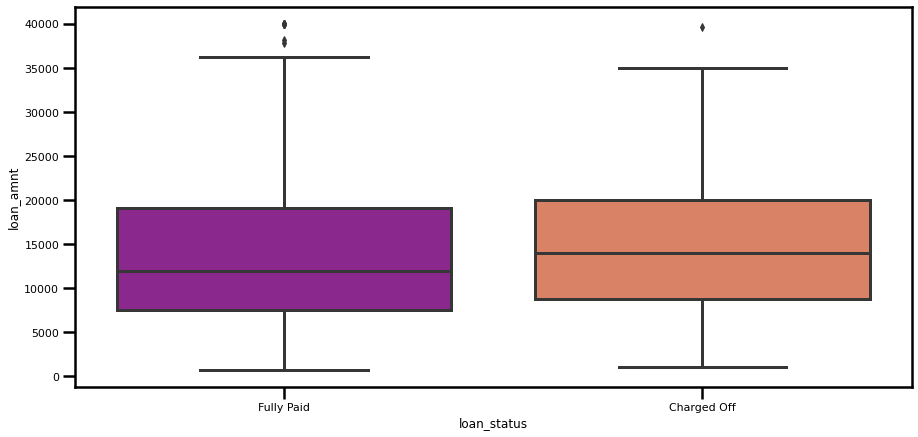

In [23]:
plt.figure(figsize=(15,7))
sns.boxplot(x="loan_status", y="loan_amnt", data=data, palette="plasma")

In [24]:
data.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4868.0,15179.776089,8466.108923,1000.0,8712.5,14000.0,20000.0,39700.0
Fully Paid,20040.0,13832.690868,8284.487917,700.0,7500.0,12000.0,19125.0,40000.0


### Diving in the feature "grade", presumably the level of worthiness of the borrowers. 

In [25]:
data["grade"].value_counts()

B    7373
C    6703
D    3948
A    3913
E    2005
F     777
G     189
Name: grade, dtype: int64

### Visualizing the relationship between the grade and loan status. As expected, borrowers tend to have a higher charged off in lower grade categories. This shows that the grade can potentially be a good indicator if the borrower has the ability to payoff or default.  

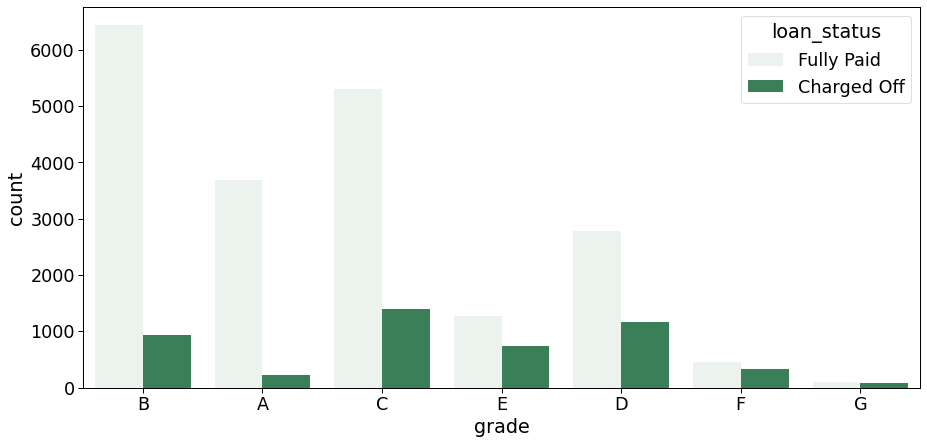

In [26]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=2)
sns.countplot(x="grade", data=data, hue="loan_status", color="seagreen")

### Visualizing in a sorted order of grade gives a better understanding of the impact of grade in loan status. The lower the grade, the higher the ratio in fully paid to charged off.

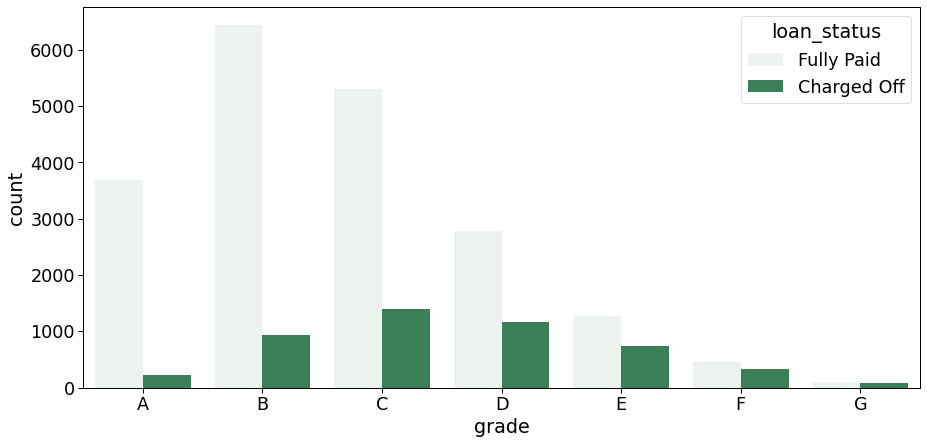

In [27]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=2)
sorted_grade = sorted(data["grade"].unique())
sns.countplot(x="grade", data=data, hue="loan_status", color="seagreen", order=sorted_grade)

In [28]:
data["loan_status"].value_counts()

Fully Paid     20040
Charged Off     4868
Name: loan_status, dtype: int64

In [29]:
data["loan_repaid"] = data["loan_status"].map({"Fully Paid":1, "Charged Off":0})

In [30]:
data[["loan_repaid", "loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
24903,0,Charged Off
24904,1,Fully Paid
24905,1,Fully Paid
24906,0,Charged Off


### Visualizing the correlation between "loan repaid" and other features. Noted that interest rate has relatively high correlation compared to the rest. This is expected as the higher the interest rate, the harder it is to pay off a loan.

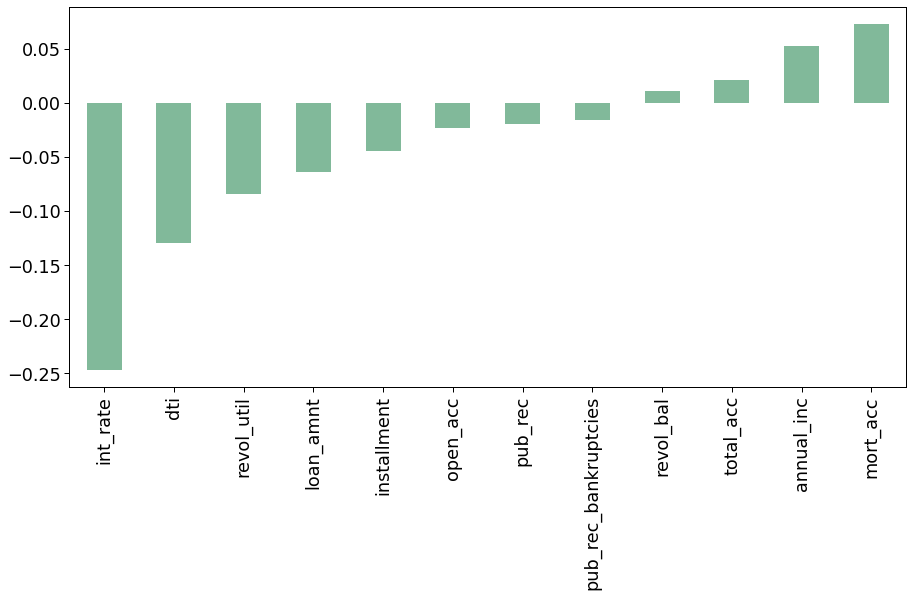

In [31]:
plt.figure(figsize=(15,7))
data.corr()["loan_repaid"].sort_values().drop("loan_repaid").plot(kind="bar", color="seagreen", alpha=0.6)

### Dealing with missing values. The number of features that have missing values is shown below. The number of missing values in each feature will determine the treatment of the feature; to drop or replace it with some other values. 

In [32]:
data.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               1408
emp_length              1133
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     93
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                16
total_acc                  0
initial_list_status        0
application_type           1
mort_acc                2277
pub_rec_bankruptcies      34
address                    1
loan_repaid                0
dtype: int64

In [33]:
data.isnull().sum() / len(data) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.652802
emp_length              4.548739
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.373374
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.064236
total_acc               0.000000
initial_list_status     0.000000
application_type        0.004015
mort_acc                9.141641
pub_rec_bankruptcies    0.136502
address                 0.004015
loan_repaid             0.000000
dtype: float64

In [34]:
data["emp_title"].nunique()

15703

In [35]:
data["emp_title"].value_counts()

Teacher                  272
Manager                  270
Supervisor               121
Registered Nurse         119
RN                       118
                        ... 
Warehouse Manger           1
VTS                        1
full service driver        1
Risk Specialist            1
Alabama Power Company      1
Name: emp_title, Length: 15703, dtype: int64

### The employment title feature has >15000 unique values. It is not feasible to keep them as a feature to be used in our machine learning model. We can drop it. 

In [36]:
data = data.drop("emp_title", axis=1)

In [37]:
sorted(data["emp_length"].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [38]:
sorted_emp_length = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

### Visualizing the employment length feature. It appears that most of the borrowers have >10yrs employment length, meaning most of the borrowers are middle-aged adults and/or matured instead of young adults. 

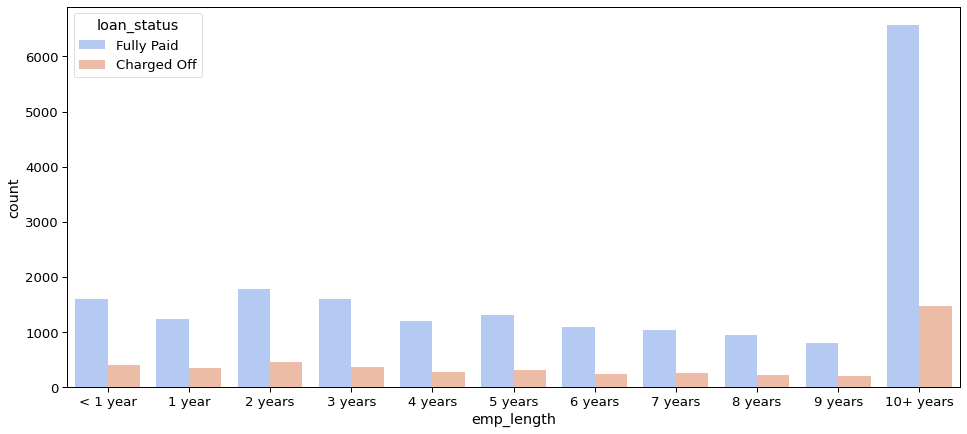

In [39]:
plt.figure(figsize=(16,7))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x="emp_length", data=data, hue="loan_status", order=sorted_emp_length, palette="coolwarm")

In [40]:
emp_co = data[data["loan_status"] == "Charged Off"].groupby("emp_length").count()["loan_status"]
emp_fp = data[data["loan_status"] == "Fully Paid"].groupby("emp_length").count()["loan_status"]

In [41]:
emp_length_graph = emp_co/(emp_co+emp_fp)

### Visualizing the number of charged off and total borrowers in percentage in each intervals of employment length. They are relatively the same across the board shown in the graph below.

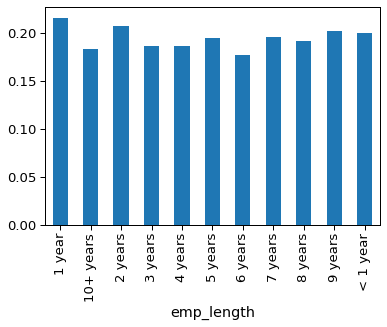

In [42]:
emp_length_graph.plot(kind="bar")

### The employment length feature does not really help us to distinguish borrowers who payoff or default. Will just drop. 

In [43]:
data = data.drop("emp_length", axis=1)

In [44]:
data.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     93
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                16
total_acc                  0
initial_list_status        0
application_type           1
mort_acc                2277
pub_rec_bankruptcies      34
address                    1
loan_repaid                0
dtype: int64

In [45]:
data["purpose"].value_counts()

debt_consolidation    14706
credit_card            5387
home_improvement       1520
other                  1272
major_purchase          534
small_business          329
car                     305
medical                 246
moving                  192
vacation                146
house                   141
wedding                 105
renewable_energy         15
educational              10
Name: purpose, dtype: int64

### Visualizing the loan purpose feature. It is apparent that top reason to borrow loans from Lending Club is debt consolidation as provided by borrowers. This is matches with common perception that people often attempt to pay off high interest rate credit card accounts with unsecured personal loan.

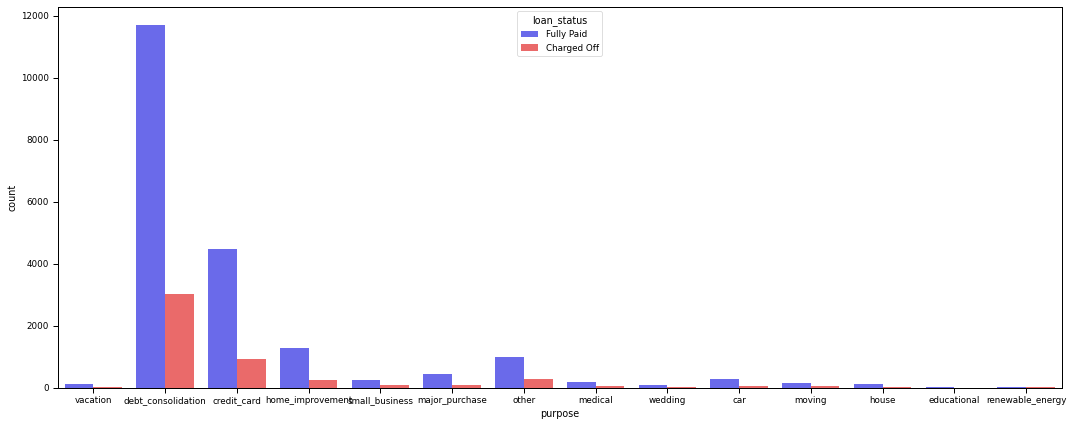

In [46]:
plt.figure(figsize=(18,7))
sns.set_context("paper", font_scale=1)
sns.countplot(x="purpose", data=data, hue="loan_status", palette="seismic")

In [47]:
data["title"].value_counts()

Debt consolidation         9651
Credit card refinancing    3322
Home improvement            973
Other                       815
Debt Consolidation          701
                           ... 
Kitchen Remodel               1
Buick Auto Loan               1
2nd story expansion           1
short loan                    1
consolidations                1
Name: title, Length: 4507, dtype: int64

### It appears that the feature "title" provides the same information as loan purpose. We can drop this feature. 

In [48]:
data = data.drop("title", axis=1)

In [49]:
data["mort_acc"].value_counts()

0.0     8916
1.0     3800
2.0     3136
3.0     2355
4.0     1764
5.0     1119
6.0      750
7.0      370
8.0      209
9.0      103
10.0      53
11.0      20
12.0      17
14.0       6
13.0       4
15.0       3
19.0       2
22.0       1
34.0       1
25.0       1
16.0       1
Name: mort_acc, dtype: int64

### Recalling that mortage account feature has ~2300 missing values. This is pretty significant as dropping this feature will significantly reduce the size of the dataset. It is probably a good idea to replace the missing values with some other values. After checking out the correlation of mortageg with other features, it is noted that total account has the highest correlation with mortgage account. it is not surprising that people have more mortgages when they have more accounts. 

In [50]:
data.corr()["mort_acc"].sort_values()

int_rate               -0.078407
dti                    -0.049764
revol_util              0.010833
pub_rec                 0.013157
pub_rec_bankruptcies    0.032710
loan_repaid             0.072693
open_acc                0.115778
installment             0.199480
revol_bal               0.217367
annual_inc              0.225145
loan_amnt               0.226838
total_acc               0.387269
mort_acc                1.000000
Name: mort_acc, dtype: float64

### Decided to replace missing values in mortgage account with the mean value based on the total account. 

In [51]:
total_acc_avg = data.groupby("total_acc").mean()["mort_acc"]

In [52]:
def fill_in_mort_acc(total_acc, mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return(mort_acc)

### Replacing the missing values with lambda function. 

In [53]:
data["mort_acc"] = data.apply(lambda x: fill_in_mort_acc(x["total_acc"], x["mort_acc"]), axis=1)

### Finding out the current standing of our missing values. Since the remaining 2 features have very low missing values, decided to just drop those missing values as it is more time-saving. 

In [54]:
data.isnull().sum()

loan_amnt                0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
home_ownership           0
annual_inc               0
verification_status      0
issue_d                  0
loan_status              0
purpose                  0
dti                      0
earliest_cr_line         0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util              16
total_acc                0
initial_list_status      0
application_type         1
mort_acc                 1
pub_rec_bankruptcies    34
address                  1
loan_repaid              0
dtype: int64

In [55]:
data = data.dropna()

In [56]:
data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [57]:
data.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
loan_repaid               int64
dtype: object

### Dealing with non-numeric type of data

In [58]:
data.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [59]:
data["term"].value_counts()

 36 months    18958
 60 months     5900
Name: term, dtype: int64

### Grabbing the numeric values "36" and "60".

In [60]:
data["term"] = data["term"].apply(lambda term: int(term[:3]))

In [61]:
data["term"].value_counts()

36    18958
60     5900
Name: term, dtype: int64

### Since sub-grade provides more information than grade, this featue will be dropped. 

In [62]:
data = data.drop("grade", axis=1)

### Preparing the data with binary classification (dummy data).

In [63]:
dummy = pd.get_dummies(data["sub_grade"], drop_first=True)

In [64]:
data = pd.concat([data.drop("sub_grade", axis=1), dummy], axis=1)

In [65]:
data.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [66]:
data["verification_status"].value_counts()

Verified           8638
Source Verified    8237
Not Verified       7983
Name: verification_status, dtype: int64

In [67]:
data["application_type"].value_counts()

INDIVIDUAL    24814
JOINT            26
DIRECT_PAY       18
Name: application_type, dtype: int64

In [68]:
data["initial_list_status"].value_counts()

f    14924
w     9934
Name: initial_list_status, dtype: int64

In [69]:
dummy = pd.get_dummies(data[["verification_status", "application_type", "initial_list_status", "purpose"]], drop_first=True)
data = pd.concat([data.drop(["verification_status", "application_type", "initial_list_status", "purpose"], axis=1), dummy], axis=1)

In [70]:
data.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [71]:
data["home_ownership"].value_counts()

MORTGAGE    12375
RENT        10096
OWN          2379
OTHER           7
ANY             1
Name: home_ownership, dtype: int64

In [72]:
data["home_ownership"] = data["home_ownership"].replace(["NONE", "ANY"], "OTHER")

In [73]:
data["home_ownership"].value_counts()

MORTGAGE    12375
RENT        10096
OWN          2379
OTHER           8
Name: home_ownership, dtype: int64

In [74]:
dummy = pd.get_dummies(data["home_ownership"], drop_first=True)
data = pd.concat([data.drop("home_ownership", axis=1), dummy], axis=1)

In [75]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0


##### Four more features with object as data type to deal with.

In [76]:
data.select_dtypes("object").columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [77]:
data["address"].value_counts()

USNV Brown\nFPO AA 70466                               3
USS Young\nFPO AE 22690                                2
USCGC Smith\nFPO AP 70466                              2
USCGC Miller\nFPO AE 22690                             2
USNV Watkins\nFPO AA 48052                             2
                                                      ..
51180 Roman Ridge\nBrewertown, AR 00813                1
66567 Whitney Lane Apt. 458\nBonnieview, HI 11650      1
0878 Cheryl Square Suite 952\nBoylestad, NV 30723      1
24555 Mack Creek Apt. 192\nFarrellborough, MD 29597    1
337 Craig Fords\nPattersonburgh, NH 93700              1
Name: address, Length: 24844, dtype: int64

#### Address has no values in our machine learning model but the ZIP code may have some sort of influence in the outcome. Grabbing the ZIP code from the address. 

In [78]:
data["zip_code"] = data["address"].apply(lambda address: address[-5:])

In [79]:
data["zip_code"].value_counts()

70466    3614
22690    3613
30723    3471
48052    3430
29597    2936
00813    2906
05113    2858
93700     706
86630     672
11650     652
Name: zip_code, dtype: int64

#### Noted that the newly engineered feature of ZIP has only a few unique counts so it is feasible to keep this feature. Getting dummy data on this feature. 

In [80]:
dummy = pd.get_dummies(data["zip_code"], drop_first=True)
data = pd.concat([data.drop("zip_code", axis=1), dummy], axis=1)

In [81]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0


In [82]:
data = data.drop("address", axis=1)

In [83]:
data = data.drop("issue_d", axis=1)

In [84]:
data["earliest_cr_line"].value_counts()

Oct-2001    204
Aug-2000    197
Aug-2002    188
Oct-2002    186
Sep-2000    181
           ... 
Jul-1970      1
Feb-1973      1
Mar-1974      1
Dec-1960      1
Aug-1974      1
Name: earliest_cr_line, Length: 557, dtype: int64

#### The feature "Earliest credit line" may be a key factor as it provides some sort of a time series information. Grabbing the year as our tim series feature. 

In [85]:
data["earliest_cr_line"] = data["earliest_cr_line"].apply(lambda year: int(year[-4:]))

In [86]:
data["earliest_cr_line"].value_counts()

2000    1856
2001    1814
2002    1670
1999    1625
2003    1505
1998    1374
2004    1246
1996    1207
1997    1158
2005    1109
1995    1051
1994    1011
2006     992
1993     759
2007     732
1992     575
1991     525
1990     502
1989     489
2008     451
1988     403
1987     331
1986     301
2009     245
1985     238
1984     231
2010     185
1983     180
1982     155
2011     125
1981     109
1979     108
1980      85
1978      82
1977      68
1976      60
1975      51
2012      48
1974      35
1973      28
1971      23
1970      23
1972      21
1969      19
1967       9
1965       9
1968       8
2013       7
1964       5
1963       4
1966       4
1960       2
1958       2
1961       1
1955       1
1953       1
Name: earliest_cr_line, dtype: int64

In [87]:
data.select_dtypes("object").columns

Index(['loan_status'], dtype='object')

#### Recalling that we have converted "fully paid" and "charged off" with binary digits, it is safe to just drop the original feature. 

In [88]:
data = data.drop("loan_status", axis=1)

#### Data cleansing process and feature-engineering complete. The dataset now has 79 features. Now preparing for training data and test data. 

In [89]:
data.head(3)

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,26.24,1990,16.0,0.0,36369.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,22.05,2004,17.0,0.0,20131.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,12.79,2007,13.0,0.0,11987.0,...,1,1,0,0,0,0,0,0,0,0


### Trainning data will be set at 80% of the dataset and test size is 20%. Random state will be set at 42, which is arbitrary.

#### The target feature or y-variable is "loan repaid" (yes = 1; no = 0). 

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X = data.drop("loan_repaid", axis=1).values
y = data["loan_repaid"].values

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scalar is used when preparing the dataset for deep learning so the data will have a more meaningful relationship among features. This can enable the machine to learn the data better. 

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
scaler = MinMaxScaler()

In [95]:
X_train = scaler.fit_transform(X_train)

In [96]:
X_test = scaler.transform(X_test)

### Preparation is complete. Importing deep neural network libraries. 

In [97]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

#### Recalling the dataset has ~20000 observations and 78 features. 

In [98]:
X_train.shape

(19886, 78)

#### Setting "rectified linear unit" as the activation function in neural network as this is a commonly used activation. Dense will be set at 78, which is an arbitrary number, as the first layer, then followed by half of it and so forth. On the final layer of the neural network, the "sigmoid" is used as the activation function, which is somewhat similar to logistic regression. For loss function, the binary cross entropy will be used since this is a binary classification model. Optimizer is set as Adam is this is the most commonly used. 

In [99]:
model = Sequential()

model.add(Dense(78, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(39, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

#### Setting epochs as 25, which is also an arbitrary number; the batch size is set at 256 (64-bit ~ personal preference).

In [100]:
model.fit(X_train, y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/25
78/78 [==============================] - 2s 7ms/step - loss: 0.4956 - val_loss: 0.3979
Epoch 2/25
78/78 [==============================] - 0s 5ms/step - loss: 0.3743 - val_loss: 0.3328
Epoch 3/25
78/78 [==============================] - 0s 6ms/step - loss: 0.3281 - val_loss: 0.3015
Epoch 4/25
78/78 [==============================] - 0s 6ms/step - loss: 0.2994 - val_loss: 0.2848
Epoch 5/25
78/78 [==============================] - 0s 6ms/step - loss: 0.2796 - val_loss: 0.2804
Epoch 6/25
78/78 [==============================] - 0s 5ms/step - loss: 0.2775 - val_loss: 0.2770
Epoch 7/25
78/78 [==============================] - 0s 5ms/step - loss: 0.2733 - val_loss: 0.2759
Epoch 8/25
78/78 [==============================] - 0s 4ms/step - loss: 0.2699 - val_loss: 0.2741
Epoch 9/25
78/78 [==============================] - 0s 5ms/step - loss: 0.2651 - val_loss: 0.2738
Epoch 10/25
78/78 [==============================] - 0s 5ms/step - loss: 0.2649 - val_loss: 0.2752
Epoch 11/25
78/78 [

In [101]:
losses = pd.DataFrame(model.history.history)

#### Loss function graph to see the performance of the deep neural network model. Noted that the loss funtion decreased sharply at the beginning, which is desirable, then trending down slowly below the validation loss. 

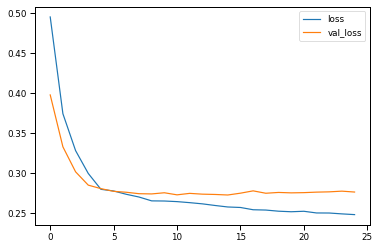

In [102]:
losses.plot()

### Evalution of the supervised machine learning deep neural network performance. 

In [103]:
from sklearn.metrics import classification_report, confusion_matrix

In [119]:
prediction = model.predict(X_test)

In [123]:
predictions = [1 if x > 0.5 else 0 for x in prediction]

In [124]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.44      0.60       981
           1       0.88      0.99      0.93      3991

    accuracy                           0.88      4972
   macro avg       0.91      0.72      0.76      4972
weighted avg       0.89      0.88      0.87      4972

[[ 429  552]
 [  28 3963]]


## Noted that the recall value is 99% on 1s and precision at 94% on 0s. This model did not do so well in recall on 0s, only at 44%, which is pretty significant. The f1-score on 1 is 93%, which is pretty good. Overall, the prediction against the true positive is 90%, which is pretty good. The overall accuracy yields 88%, which is much better than a random guess. 
## The deep neural network algorithm can be further optimized using Earlystopping and dropout. 